# Problem 1
 Consider shuttle dispatching problem in which a dispatcher is responsible to decide whether or not to dispatch a shuttle at each decision epoch depending on number of customers waiting for the service. A standard shuttle dispatch problem has following parameters:

K = The capacity of a shuttle if it is dispatched. 

At = A random variable giving the number of customers arriving during time interval t. 

cf = The cost of dispatching a shuttle. 

ch = The cost per customer left waiting per time period.

Given K = 15, cf = 100, ch = 2 and assuming that At follows unif{1,5}, model the problem and solve it using:

a) Enumeration (with time period $T =500$) 

b) Value iteration ($T = \infty$) 

c) Policy iteration.

You can assume that number of people in station can not exceed 200 and discount rate γ = 0.95.


## Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Constant

In [0]:
K = 15
c_f = 100
c_h = 2
gamma = 0.95
max_customer = 200

T = 500

## Rewards function

In [0]:
def r(s,a):
    """
    s: number of current waiting customer 0-max_customer
    a: if or not dispatch a shuttle {0,1}
    """
    return -(a*c_f + max(0,s-a*K)*c_h)
    

## Part (a) Enumeration

For part (a), plot optimal value function at time 0 versus number of customers waiting.

In [0]:
V = np.zeros((T+2,max_customer+1)) # value function, size of [time, #customer]

for t in range(T,-1,-1):
    for s in range(max_customer+1):
        v_a = [0, 0]
        for a in [0,1]:
            s_next = [min(max_customer, max(s-a*K,0)+i) for i in range(1,6)]
            v_a[a] = r(s,a) + gamma * np.mean(V[t+1,s_next])
        V[t,s] = max(v_a)



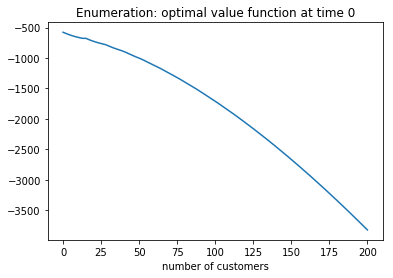

In [0]:
plt.figure()
plt.plot(V[0, :])
plt.xlabel("number of customers")
plt.title("Enumeration: optimal value function at time 0")
plt.show()

## part (b)
For part (b), plot optimal value function versus number of customers waiting.

In [0]:
max_iter = 1000
eps = 1e-6
interval = 100

V = np.zeros((2,max_customer+1)) # value iteration. [cur, next]

for i in range(max_iter):
    V[1] = V[0]
    for s in range(max_customer+1):
        v_a = [0, 0]
        for a in [0,1]:
            s_next = [min(max_customer, max(s-a*K,0)+i) for i in range(1,6)]
            v_a[a] = r(s,a) + gamma * np.mean(V[1,s_next])
        V[0,s] = max(v_a)
    if (np.linalg.norm(V[0]-V[1]) < eps):
        break
    if (i%interval == 0):
        print(i,np.linalg.norm(V[0]-V[1]))
        
print("Converged at #iteration = %d, residual = %f"%(i, np.linalg.norm(V[0]-V[1])))

0 3278.2312304045913
100 2.849879646666814
200 0.01687279572192988
300 9.989588043432436e-05
Converged at #iteration = 390, residual = 0.000001


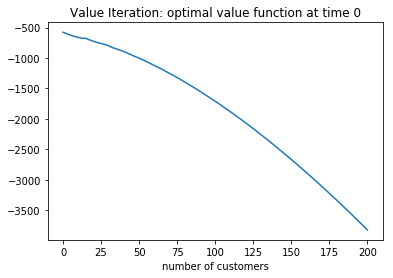

In [0]:
plt.figure()
plt.plot(V[0, :])
plt.xlabel("number of customers")
plt.title("Value Iteration: optimal value function at time 0")
plt.show()

## part (c)
For part (c), plot optimal policy versus number of customers waiting.

In [0]:
def prob(policy):
    P = np.zeros((max_customer+1, max_customer+1))
    for s in range(max_customer+1):        
        a = policy[s]
        idx = max(s-a*K, 0) + 1
        for i in range(5):
            P[s, min(max_customer, idx+i)] += 1/5
    return P

pi = np.zeros((2,max_customer+1)).astype(int)

for i in range(max_iter):
    P = prob(pi[0])
    R = np.zeros(max_customer+1)
    for s in range(max_customer+1):
        R[s] = r(s, pi[0,s])
    A = np.eye(max_customer+1) - gamma*P
    b = np.mat(R).transpose()
    V = np.array(np.linalg.solve(A, b).transpose())[0]
    
    pi[1] = pi[0]
    for s in range(max_customer+1):
        v_a = [0, 0]
        for a in [0, 1]:
            
            s_next = [min(max_customer, max(s-a*K,0)+i) for i in range(1,6)]
            v_a[a] = r(s,a) + gamma * np.mean(V[s_next])
            
        pi[0,s] = np.argmax(v_a)
    print(i, np.linalg.norm(pi[0]-pi[1]) )
    if np.linalg.norm(pi[0]-pi[1]) < eps:
        break
print("Converged at #iteration = %d, residual = %f"%(i, np.linalg.norm(pi[0]-pi[1])))

0 14.0
1 5.291502622129181
2 4.69041575982343
3 2.6457513110645907
4 1.0
5 0.0
Converged at #iteration = 5, residual = 0.000000


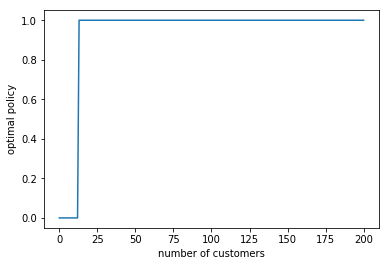

optimal policy:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [0]:
plt.figure()
#plt.scatter(enumerate([pi[0]]))
plt.plot(pi[0])
plt.xlabel("number of customers")
plt.ylabel("optimal policy")
plt.show()

print('optimal policy: ', policy)

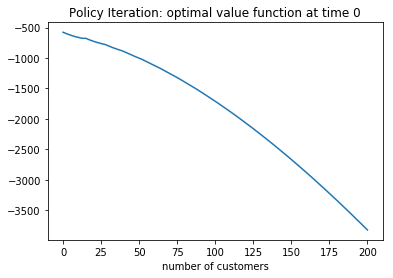

In [0]:
plt.figure()
plt.plot(V)
plt.xlabel("number of customers")
plt.title("Policy Iteration: optimal value function at time 0")
plt.show()

# Problem 2

The differences from problem 1 are:
* There are 5 types of customers with $c_h = \{1,1.5,2,2.5,3\}$
* each type customer cannot exceed 100.
* K = 30.

## Due to the huge memory usage, I have to reduce two dimensions of this problem

In [0]:
max_customer_each = 20  # this is reduced to 20 in order to speed up the computation
c_f = -100
c_h = [-1, -1.5, -2] 
K = 10
gamma = 0.95
num_types = len(c_h)   
num_states = pow(max_customer_each+1, num_types)  
T = 100

In [0]:
def reward(s, a):   # reward function
    res = int(sum(a)>0) * c_f
    for i in range(num_types):
        res += max(s[i] - a[i], 0) * c_h[i]
    return res


# encode the states S[3,4,5,6,7] into 3*pow(101, 0) + 4*pow(101, 1) + ^ + 7*pow(101, 5)
num_states = pow(max_customer_each + 1,num_types)

def encode_list(list_state):
    state = 0
    for i in range(num_types):
        state += list_state[i] * pow(max_customer_each+1, i)
    return(state)

def decode_state(state):
    #state_tmp = state.copy()
    list_state = [0]*num_types
    for i in range(num_types):
        list_state[i] = state%(max_customer_each+1)
        state = state//(max_customer_each+1)
    return(list_state)


def available_action(s):
    res = [[0 for i in range(num_types)]]
    a = [0 for i in range(num_types)]
    for i in range(len(s)-1, -1, -1):
        if s[i] > 0:
            a[i] = min(K-sum(a), s[i])
            if sum(a) == K:
                break
    res.append(a)
    return res


def gen_next_states(s, a):
    # find the indices of all possible next states
    res_ = []    
    for i in range(num_types):
        res_.append(list(range(max(s[i]-a[i], 0)+1, max(s[i]-a[i], 0)+4)))    
    for i in range(num_types):
        for j in range(len(res_[i])):
            if res_[i][j] > max_customer_each:
                res_[i][j] = max_customer_each
    list_res = [a*pow(max_customer_each,2)+b*(max_customer_each+1)+c for a in res_[0] for b in res_[1] for c in res_[2]]
    return list_res

In [0]:
V = np.zeros((2,num_states))

for i in range(T, -1, -1):
    V[1] = V[0]
    for s in range(num_states):
        state_list = decode_state(s)
        possible_value = [0, 0]
        for action_idx in [0, 1]:
            a = available_action(state_list)[action_idx]
            next_state_idx = gen_next_states(state_list, a)
            possible_value[action_idx] = gamma*V[1,next_state_idx].mean() + reward(state_list, a)
        V[0,s] = max(possible_value)

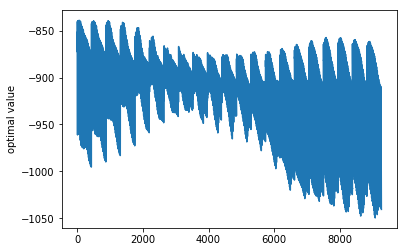

In [0]:
plt.figure()
plt.plot(V[0])
plt.show()


## Part(b)

In [0]:
V = np.zeros((2,num_states))
max_iter = 500
eps = 1e-6 
interval = 100
for i in range(max_iter):
    V[1] = V[0]
    for s in range(num_states):
        state_list = decode_state(s)
        possible_value = [0, 0]
        for action_idx in [0, 1]:
            a = available_action(state_list)[action_idx]
            next_state_idx = gen_next_states(state_list, a)
            possible_value[action_idx] = gamma*V[1,next_state_idx].mean() + reward(state_list, a)
        V[0,s] = max(possible_value)
    if i % interval == 0:
        print(i, np.linalg.norm(V[0]-V[1]))
    if np.linalg.norm(V[0]-V[1]) < eps:
        break

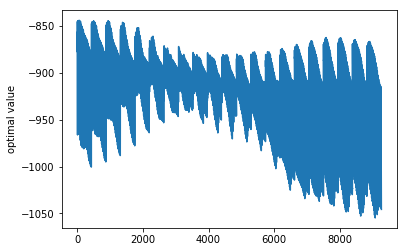

In [19]:
plt.figure()
plt.plot(V[0])
plt.show()

## Part(c)

In [18]:
V = np.zeros((2,num_states))
pi = np.zeros(num_states)
max_iter = 500
interval = 10
for i in range(max_iter):
    V[1] = V[0]

    for s in range(num_states):
        state_list = decode_state(s)
        a_idx = pi[s]
        a = available_action(state_list)[int(a_idx)]
        next_state_idx = gen_next_states(state_list, a)
        next_value = gamma*V[1,next_state_idx].mean() + reward(state_list, a)
        V[0, s] = next_value
        
    # Policy update
    for s in range(num_states):
        state_list = decode_state(s)
        possible_value = [0, 0]
        for a in [0, 1]:
            al = available_action(state_list)[a]
            next_state_idx = gen_next_states(state_list, al)
            possible_value[a] = gamma*V[0, next_state_idx].mean() + reward(state_list, al)
        pi[s] = np.argmax(possible_value)
    
    if i % interval == 0:
        print(i, np.linalg.norm(V[0]-V[1]))
    if np.linalg.norm(V[0]-V[1]) < 1e-6*np.sqrt(num_states):
        break

0 4606.0186169836525
10 2646.6253746299094
20 1584.7921945340215
30 948.9082360379376
40 568.1468103061503
50 340.1704683062822
60 203.67262440655873
70 121.94632372610813
80 73.01376861887671
90 43.716040345131994
100 26.174408191865844
110 15.671585047174585
120 9.383156864159
130 5.61804262123988
140 3.363729643552132
150 2.013989191205799
160 1.205849724001663
170 0.721986772930444
180 0.43228015059463415
190 0.2588220942612065
200 0.154966348525106
210 0.09278407720088433
220 0.055553254393309055
230 0.03326178550011948
240 0.019915059644299946
250 0.011923881856354242
260 0.007139268526505411
270 0.004274543785838009
280 0.0025593272629023736
290 0.0015323637717308933
300 0.0009174827940601398
310 0.0005493308399253053
320 0.0003289046654998318
330 0.000196927372849136
340 0.00011790769252589074


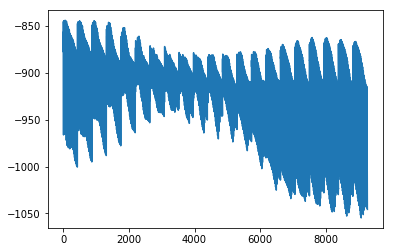

In [22]:
plt.figure()
plt.plot(V[0])
plt.show()